In [1]:
import csky as cy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
from icecube import astro
plt.rc('font', size=16)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
soft_colors = cy.plotting.soft_colors

In [2]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/dataset_plots')
preliminary = True

In [3]:
#Final Level Plots

In [4]:
corsika = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_CORSIKA_20904.hdf')
muon = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_MuonGun_2131x.hdf')
mc = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_NuGen_bfrv1_2153x.hdf')
snowstorm = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p00/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.hdf')
exp = pd.DataFrame()
for year in np.arange(2011,2021,1):
    print('loading {}'.format(year))
    e = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_{}_exp.hdf'.format(year))
    exp = pd.concat([exp, e])


loading 2011
loading 2012
loading 2013
loading 2014
loading 2015
loading 2016
loading 2017
loading 2018
loading 2019
loading 2020


In [5]:
del e

In [6]:
def ang_res_plot(ax, mc, color='green'):

    akw = dict (bins=(15,10**4), range=((5e2, 1e7), (0, 180)), log=(True,False))

    hnn = hl.hist_slide ((5,1), (mc.trueE, np.degrees (mc.dpsi)), mc.weights_mese_flux, **akw)
    hnn = hnn.normalize()

    hnn2_baseline = hnn2 = hnn.contain (1, .2)
    hnn5_baseline = hnn5 = hnn.contain (1, .5)
    hnn8_baseline = hnn8 = hnn.contain (1, .8)

    hl.fill_between (ax, 0, hnn5, color=color, alpha=.3, drawstyle='default')
    hl.fill_between (ax, 0, hnn8, color=color, alpha=.3, drawstyle='default')

    
    hl.plot1d (ax, hnn2, color=color, lw=2,ls='--', drawstyle='default')
    hl.plot1d (ax, hnn8, color=color, lw=1, ls='--', drawstyle='default')
    hl.plot1d (ax, hnn5, color=color, lw=3, drawstyle='default')



    nans = [np.nan, np.nan]
    ax.plot (nans, nans, color=color, lw=5, alpha=1 , label=r'50$\%$ DNNC')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.6)**2 , label=r'20$\%$ DNNC')
    ax.plot (nans, nans, color=color, lw=5, alpha=1 -(1-0.9)**2, label=r'80$\%$ DNNC')

    #ax.plot (nans, nans, color=soft_colors[3], lw=4, alpha=1 - (1-0.6)**2, label=r'50\% (MESC)')
    #ax.plot (nans, nans, color=soft_colors[3], lw=2, alpha=1 - (1-0.9)**2, ls ='--', label=r'20\% (MESC)')

    plt.legend(ncol =1)

    ax.set_xlabel (r'$E_{true}$ [GeV]')
    ax.set_ylabel (r'$\Delta\Psi[{true,reco}]~[^\circ]$')
    ax.set_xlim (5e2, 1e7)
    ax.set_ylim (0, 50)
    ax.semilogx()
    #plt.title ('ECAS Angular Resolution test_mcMu ONLY')
    #plt.tight_layout()
    cy.plotting.saving (plot_dir, 'ang_res')


In [17]:
def ang_res_plot_flavor(ax, mc):

    akw = dict (bins=(15,10**4), range=((5e2, 1e7), (0, 180)), log=(True,False))
    colors = (soft_colors[0], soft_colors[1], soft_colors[2])
    labels = [r'$\nu_e$' , r'$\nu_\mu$', r'$\nu_\tau$']
    for flavor, color, label in zip([12,14,16], colors, labels):
        mask = np.abs(mc.MCPrimary_pdg_encoding) == flavor
        
        hnn = hl.hist_slide ((5,1), (mc[mask].trueE, np.degrees (mc[mask].dpsi)), 
                             mc[mask].weights_mese_flux, **akw)
        hnn = hnn.normalize()

        hnn2_baseline = hnn2 = hnn.contain (1, .2)
        hnn5_baseline = hnn5 = hnn.contain (1, .5)
        hnn8_baseline = hnn8 = hnn.contain (1, .8)

        #hl.fill_between (ax, 0, hnn5, color=color, alpha=.3, drawstyle='default')
        #hl.fill_between (ax, 0, hnn8, color=color, alpha=.3, drawstyle='default')


        hl.plot1d (ax, hnn2, color=color, lw=2,ls='--', drawstyle='default')
        hl.plot1d (ax, hnn8, color=color, lw=1, ls='--', drawstyle='default')
        hl.plot1d (ax, hnn5, color=color, lw=3, drawstyle='default')



        nans = [np.nan, np.nan]
        ax.plot (nans, nans, color=color, lw=5, alpha=1 , label=r'50$\%$ DNNC {}'.format(label))
        ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.6)**2 , label=r'20$\%$ DNNC {}'.format(label))
        ax.plot (nans, nans, color=color, lw=5, alpha=1 -(1-0.9)**2, label=r'80$\%$ DNNC {}'.format(label))

    #ax.plot (nans, nans, color=soft_colors[3], lw=4, alpha=1 - (1-0.6)**2, label=r'50\% (MESC)')
    #ax.plot (nans, nans, color=soft_colors[3], lw=2, alpha=1 - (1-0.9)**2, ls ='--', label=r'20\% (MESC)')

    plt.legend(ncol =3)

    ax.set_xlabel (r'$E_{true}$ [GeV]')
    ax.set_ylabel (r'$\Delta\Psi[{true,reco}]~[^\circ]$')
    ax.set_xlim (5e2, 1e7)
    ax.set_ylim (0, 50)
    ax.semilogx()
    #plt.title ('ECAS Angular Resolution test_mcMu ONLY')
    #plt.tight_layout()
    cy.plotting.saving (plot_dir, 'ang_res_flavor')


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/ang_res_flavor


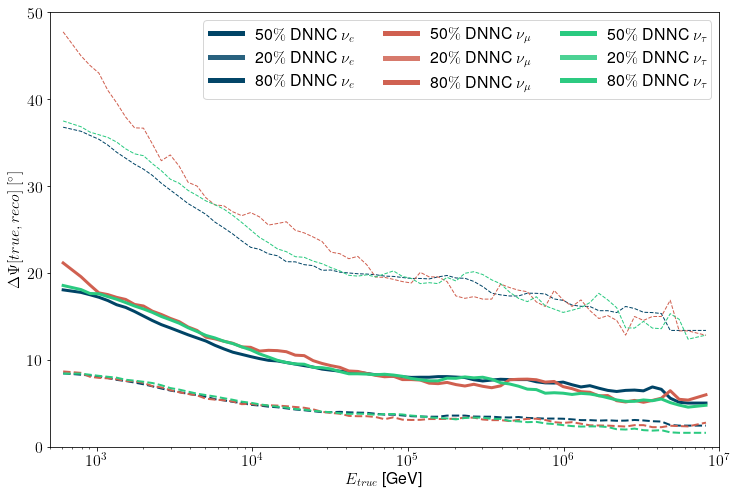

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ang_res_plot_flavor(ax, mc)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/ang_res


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


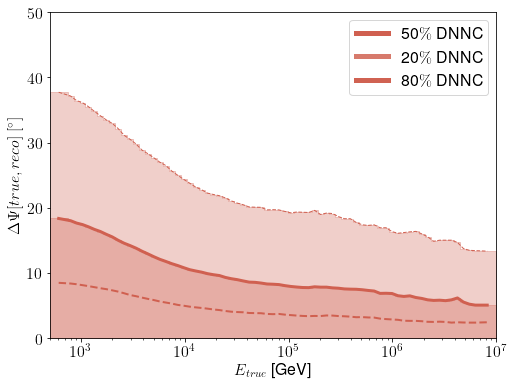

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ang_res_plot(ax, mc, color=soft_colors[1])

In [8]:
specs = cy.selections.MESEDataSpecs.mesc_7yr
repo = cy.selections.Repository()
ana = cy.get_analysis(repo, 'version-001-p02', specs)

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [9]:
a = ana[-1]
a.sig.dpsi = astro.angular_distance(a.sig.dec, a.sig.ra, a.sig.true_dec, a.sig.true_ra)
a.sig.weights = 2e-18 * (a.sig.true_energy/1e5)**-2.5
mese = a.sig

In [10]:
def ang_res_plot_2(ax, mc1, mc2, c1='green', c2='blue'):

    akw = dict (bins=(15,10**4), range=((5e2, 1e7), (0, 180)), log=(True,False))

    hnn = hl.hist_slide ((5,1), (mc1.trueE, np.degrees (mc1.dpsi)), mc1.weights_mese_flux, **akw)
    hnn = hnn.normalize()

    hnn2_baseline = hnn2 = hnn.contain (1, .2)
    hnn5_baseline = hnn5 = hnn.contain (1, .5)
    hnn8_baseline = hnn8 = hnn.contain (1, .8)

    hl.fill_between (ax, 0, hnn5, color=c1, alpha=.3, drawstyle='default')
    hl.fill_between (ax, 0, hnn8, color=c1, alpha=.3, drawstyle='default')

    hl.plot1d (ax, hnn2, color=c1, lw=2,ls='--', drawstyle='default')
    hl.plot1d (ax, hnn8, color=c1, lw=1, ls='--', drawstyle='default')
    hl.plot1d (ax, hnn5, color=c1, lw=3, drawstyle='default')

    
    
    hss = hl.hist_slide ((5,1), (mc2.trueE, np.degrees (mc2.dpsi)), mc2.weights_mese_flux, **akw)
    hss = hss.normalize()

    hss2_baseline = hss2 = hss.contain (1, .2)
    hss5_baseline = hss5 = hss.contain (1, .5)
    hss8_baseline = hss8 = hss.contain (1, .8)

    hl.fill_between (ax, 0, hss5, color=c2, alpha=.3, drawstyle='default')
    hl.fill_between (ax, 0, hss8, color=c2, alpha=.3, drawstyle='default')

    hl.plot1d (ax, hss2, color=c2, lw=2,ls='--', drawstyle='default')
    hl.plot1d (ax, hss8, color=c2, lw=1, ls='--', drawstyle='default')
    hl.plot1d (ax, hss5, color=c2, lw=3, drawstyle='default')

    nans = [np.nan, np.nan]
    ax.plot (nans, nans, color=c1, lw=1,  ls='--', alpha=1 -(1-0.9)**2, label=r'80$\%$ DNNC')
    ax.plot (nans, nans, color=c1, lw=3, alpha=1 , label=r'50$\%$ DNNC')
    ax.plot (nans, nans, color=c1, lw=2,  ls='--', alpha=1 - (1-0.6)**2 , label=r'20$\%$ DNNC')
    

    ax.plot (nans, nans, color=c2, lw=1, ls='--', alpha=1 -(1-0.9)**2, label=r'80$\%$ DNNC (Full Range Systematics)')       
    ax.plot (nans, nans, color=c2, lw=3, alpha=1 , label=r'50$\%$ DNNC (Full Range Systematics)')
    ax.plot (nans, nans, color=c2, lw=2,  ls='--', alpha=1 - (1-0.6)**2 , label=r'20$\%$ DNNC (Full Range Systematics)')


    plt.legend(ncol =2)

    ax.set_xlabel (r'$E_{true}$ [GeV]')
    ax.set_ylabel (r'$\Delta\Psi[{true,reco}]~[^\circ]$')
    ax.set_xlim (5e2, 1e7)
    ax.set_ylim (0, 50)
    ax.semilogx()
    #plt.title ('ECAS Angular Resolution test_mcMu ONLY')
    #plt.tight_layout()
    cy.plotting.saving (plot_dir, 'ang_res_sys')


In [11]:
def ang_res_plot_3(ax, mc1, mese, c1='red', c2='C0'):

    akw = dict (bins=(15,10**4), range=((5e2, 1e7), (0, 180)), log=(True,False))

    hnn = hl.hist_slide ((5,1), (mc1.trueE, np.degrees (mc1.dpsi)), mc1.weights_mese_flux, **akw)
    hnn = hnn.normalize()

    hnn2_baseline = hnn2 = hnn.contain (1, .2)
    hnn5_baseline = hnn5 = hnn.contain (1, .5)
    hnn8_baseline = hnn8 = hnn.contain (1, .8)

    hl.fill_between (ax, 0, hnn5, color=c1, alpha=.3, drawstyle='default')
    hl.fill_between (ax, 0, hnn8, color=c1, alpha=.3, drawstyle='default')

    hl.plot1d (ax, hnn2, color=c1, lw=2,ls='--', drawstyle='default')
    hl.plot1d (ax, hnn8, color=c1, lw=1, ls='--', drawstyle='default')
    hl.plot1d (ax, hnn5, color=c1, lw=3, drawstyle='default')

    
    
    hss = hl.hist_slide ((5,1), (mese.true_energy, np.degrees (mese.dpsi)), mese.weights, **akw)
    hss = hss.normalize()

    hss2_baseline = hss2 = hss.contain (1, .2)
    hss5_baseline = hss5 = hss.contain (1, .5)
    hss8_baseline = hss8 = hss.contain (1, .8)

    hl.fill_between (ax, 0, hss5, color=c2, alpha=.2, drawstyle='default')
    hl.fill_between (ax, 0, hss8, color=c2, alpha=.2, drawstyle='default')

    hl.plot1d (ax, hss2, color=c2, lw=2,ls='--', drawstyle='default')
    hl.plot1d (ax, hss8, color=c2, lw=1, ls='--', drawstyle='default')
    hl.plot1d (ax, hss5, color=c2, lw=3, drawstyle='default')

    nans = [np.nan, np.nan]
    ax.plot (nans, nans, color=c1, lw=1,  ls='--', alpha=1 -(1-0.9)**2, label=r'80$\%$ DNNCascade')
    ax.plot (nans, nans, color=c1, lw=3, alpha=1 , label=r'50$\%$ DNNCascade')
    ax.plot (nans, nans, color=c1, lw=2,  ls='--', alpha=1 - (1-0.6)**2 , label=r'20$\%$ DNNCascade')
    

    ax.plot (nans, nans, color=c2, lw=1, ls='--', alpha=1 -(1-0.9)**2, label=r'80$\%$  MESC-7yr')       
    ax.plot (nans, nans, color=c2, lw=3, alpha=1 , label=r'50$\%$ MESC-7yr')
    ax.plot (nans, nans, color=c2, lw=2,  ls='--', alpha=1 - (1-0.6)**2 , label=r'20$\%$ MESC-7yr')


    plt.legend(ncol =2)

    ax.set_xlabel (r'$E_\textsf{True}$ [GeV]')
    ax.set_ylabel (r'$\Delta\Psi[\textsf{True,Reco}]~[^\circ]$')
    ax.set_xlim (5e2, 1e7)
    ax.set_ylim (0, 50)
    ax.semilogx()
    #plt.title ('ECAS Angular Resolution test_mcMu ONLY')
    #plt.tight_layout()
    cy.plotting.saving (plot_dir, 'ang_res_mese')


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/ang_res_mese


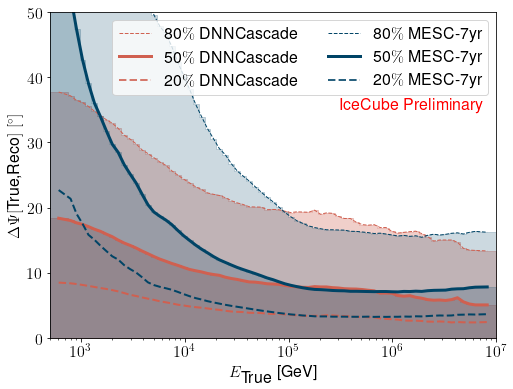

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ang_res_plot_3(ax, mc, mese, c1=soft_colors[1], c2=soft_colors[0])
if preliminary:
    plt.text(10**5.5, 35, 'IceCube Preliminary', c='r')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/ang_res_sys


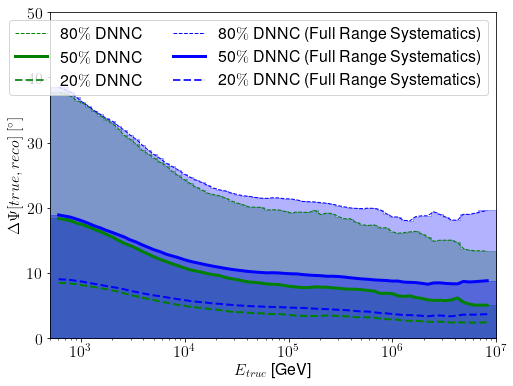

In [13]:
fig,ax = plt.subplots(figsize=(8,6))
ang_res_plot_2(ax, mc, snowstorm)

In [14]:
def energyresplot(ax, mc):
    h = hl.hist ((mc.trueE, mc.energy), mc.weights_mese_flux,
                 bins=40, range=(5e2,1e7), log=True).normalize()
    x = hl.plot2d (ax, h, cbar=True, log=True, cmap='viridis', vmin=1e-18)
    x['colorbar'].set_label ('Probability ensity')
    plt.xlabel (r'$E_\textsf{True}$')
    plt.ylabel (r'$E_\textsf{Reco}$')
    plt.loglog()
    plt.plot ([1e2, 1e7], [1e2, 1e7], color='k', ls='--')
    ax.set_aspect ('equal')
    #ax.set_title ('DNN general')
    cy.plotting.saving (plot_dir, 'trueE_vs_recoE')

-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/trueE_vs_recoE


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


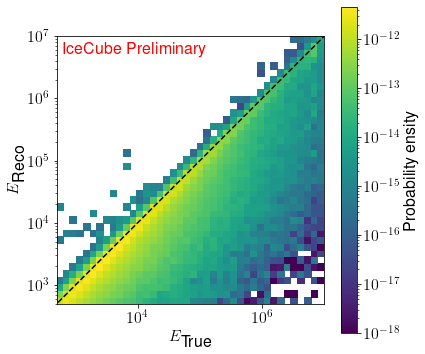

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
energyresplot(ax, mc)
if preliminary:
    plt.text(10**2.8, 10**6.7, 'IceCube Preliminary', c='r')

In [16]:
def energy_angle(ax, mc):
    delta_E = np.abs(mc.trueE - mc.energy)
    h = hl.hist ((delta_E, np.degrees(mc.dpsi)), mc.weights_mese_flux,
                 bins=40, range=[(500,1e6),(0,90)], log=(True,False))
    x = hl.plot2d (ax, h, cbar=True, log=True, cmap='viridis')
    x['colorbar'].set_label ('probability density')
    plt.xlabel (r'$\Delta$(E)')
    plt.ylabel (r'$\Delta(\Psi)^\circ$')
    #plt.loglog()
    #plt.plot ([1e2, 1e7], [1e2, 1e7], color='k', ls='--')
    #ax.set_aspect ('equal')
    #ax.set_title ('DNN general')
    #cy.plotting.saving (plot_dir, 'energy_true_vs_reco')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


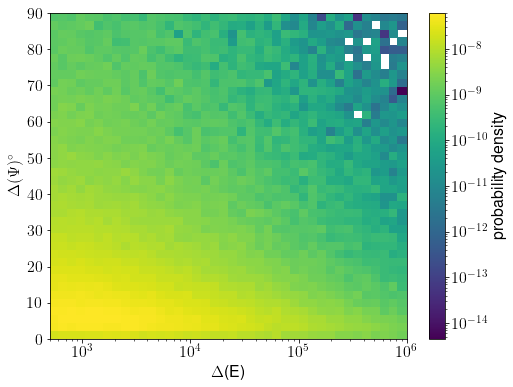

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
energy_angle(ax, mc)

In [18]:
#data/mc 

In [19]:
mask = (exp.runs % 10 == 0 ) 


In [20]:
sum(np.unique(exp.ExpLivetime_livetime[mask]))

304100756.4628376

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/azimuth_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


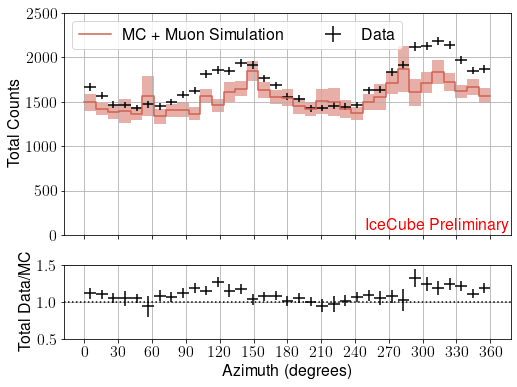

In [21]:
#lt = 3519.685 * 86400 
bins = 35
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins, range=(0,360))
hb_mc = hl.hist(np.degrees(mc.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((mc.weights)) , 
                bins = bins, range=(0,360))

hb_ss = hl.hist(np.degrees(snowstorm.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((snowstorm.weights)) , 
                bins = bins, range=(0,360))

hb_corsika = hl.hist(np.degrees(corsika.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((corsika.weights)) , 
                bins = bins, range=(0,360))
hb_muon = hl.hist(np.degrees(muon.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((muon.weights)) , 
                bins = bins, range=(0,360))
hb_t = hb_mc + hb_corsika #+ hb_muon
hl.plot1d(ax1, hb_t, errorbands=True, label='MC + Muon Simulation', color=soft_colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Azimuth (degrees)')
ax1.set_ylim(0,2500)
ax1.set_xticks(np.arange(0,360.1,30))
ax.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k')
if preliminary:
    ax1.text(250, 50, 'IceCube Preliminary', c='r')
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/azimuth_datamc_1TeV


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a mas

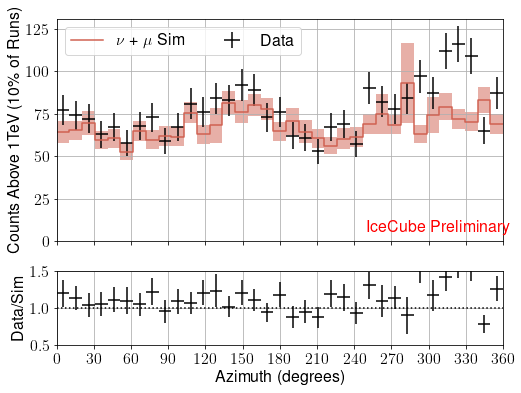

In [22]:
#lt = 3519.685 * 86400 
bins = 35
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
mask = (exp.energy < 1e3) & (exp.runs % 10 == 0 )
hb_data = hl.hist(np.degrees(exp[mask].EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins, range=(0,360))
mask = mc.energy < 1e3
hb_mc = hl.hist(np.degrees(mc[mask].EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((mc[mask].weights) /10) , 
                bins = bins, range=(0,360))
mask = snowstorm.energy < 1e3
hb_ss = hl.hist(np.degrees(snowstorm[mask].EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((snowstorm[mask].weights) / 10 ) , 
                bins = bins, range=(0,360))

mask = corsika.energy < 1e3
hb_corsika = hl.hist(np.degrees(corsika[mask].EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((corsika[mask].weights) / 10 ) , 
                bins = bins, range=(0,360))

mask = muon.energy < 1e3
hb_muon = hl.hist(np.degrees(muon[mask].EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, 
                weights=((muon[mask].weights) / 10 ) , 
                bins = bins, range=(0,360))
hb_t = hb_mc + hb_corsika + hb_muon
hl.plot1d(ax1, hb_t, errorbands=True, label=r'$\nu$ + $\mu$ Sim', color=soft_colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Azimuth (degrees)')
ax1.set_ylim(0)
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Data/Sim')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k')
if preliminary:
    ax1.text(250, 5, 'IceCube Preliminary', c='r')      
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Counts Above 1TeV (10\% of Runs)')
cy.plotting.saving(plot_dir , 'azimuth_datamc_1TeV')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/coszen_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


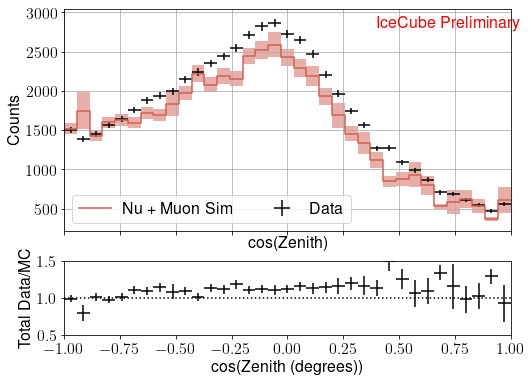

In [23]:
bins = 35
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)


hb_data = hl.hist(np.cos(exp.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, bins=bins, range=(-1,1))

hb_mc = hl.hist(np.cos(mc.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((mc.weights)) , 
                bins = bins, range=(-1,1))

hb_ss = hl.hist(np.cos(snowstorm.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((snowstorm.weights)) , 
                bins = bins, range=(-1, 1))

hb_corsika = hl.hist(np.cos(corsika.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((corsika.weights)) ,
                bins = bins, range=(-1, 1))
hb_muon = hl.hist(np.cos(muon.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=muon.weights , 
                bins = bins, range=(-1, 1))
                     
hb_t = hb_mc + hb_corsika #+ hb_muon
                     
hl.plot1d(ax1, hb_t, errorbands=True, label='Nu + Muon Sim', color=soft_colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'cos(Zenith (degrees))')
#ax1.set_ylim(0, 700)
#ax1.set_xticks(np.arange(-1,1.1,30))
ax1.set_xlim(-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k')
if preliminary:
    ax1.text(.4, 2805, 'IceCube Preliminary', c='r')    
ax1.set_xlabel('cos(Zenith)')
ax1.set_ylabel('Counts')
cy.plotting.saving(plot_dir , 'coszen_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/coszen_datamc_1TeV


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


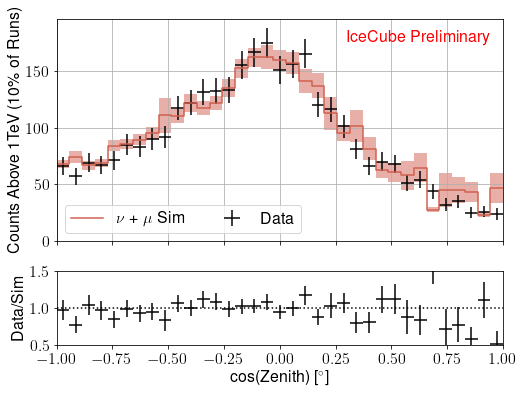

In [24]:

bins = 35
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

mask = (exp.energy > 1e3) & (exp.runs % 10 == 0) 
hb_data = hl.hist(np.cos(exp[mask].EventGeneratorSelectedRecoNN_I3Particle_zenith).values, bins=bins, range=(-1,1))
mask = mc.energy > 1e3
hb_mc = hl.hist(np.cos(mc[mask].EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((mc[mask].weights) /10) , 
                bins = bins, range=(-1,1))

hb_ss = hl.hist(np.cos(snowstorm.EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((snowstorm.weights)/10) , 
                bins = bins, range=(-1, 1))
mask = corsika.energy > 1e3
hb_corsika = hl.hist(np.cos(corsika[mask].EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((corsika[mask].weights)/10) , 
                bins = bins, range=(-1, 1))
mask = muon.energy > 1e3
hb_muon = hl.hist(np.cos(muon[mask].EventGeneratorSelectedRecoNN_I3Particle_zenith).values, 
                weights=((muon[mask].weights)/10) , 
                bins = bins, range=(-1, 1))

hb_t = hb_mc + hb_corsika + hb_muon
hl.plot1d(ax1, hb_t, errorbands=True, label=r'$\nu$ + $\mu$ Sim', color=soft_colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'cos(Zenith) [$^\circ$]')
ax1.set_ylim(0)
#ax1.set_xticks(np.arange(-1,1.1,30))
ax1.set_xlim(-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Data/Sim')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k')
if preliminary:
    ax1.text(.3, 175, 'IceCube Preliminary', c='r')    
#ax1.set_xlabel('cos(Zenith)')
ax1.set_ylabel('Counts Above 1TeV (10\% of Runs)')
cy.plotting.saving(plot_dir , 'coszen_datamc_1TeV')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/energy_bfr_1TeV


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


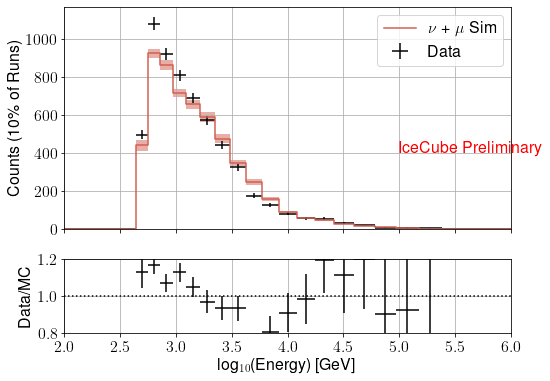

In [25]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
bins = 35
mask = (exp.runs % 10 == 0) 
hb_data = hl.hist(np.log10(exp[mask].energy.values),  log=True, bins=bins, range=(2,8))

hb_mc = hl.hist(
    np.log10(mc.energy.values), 
    weights=mc.weights / 10 , 
    log=True, bins=bins, range=(2,8))

hb_corsika = hl.hist(
    np.log10(corsika.energy.values), 
    weights=corsika.weights / 10, 
    log=True, bins=bins, range=(2,8))
hb_muon = hl.hist(
    np.log10(muon.energy.values), 
    weights=muon.weights / 10 , 
    log=True, bins=bins, range=(2,8))
hb_ss = hl.hist(
    np.log10(snowstorm.energy.values), 
    weights=snowstorm.weights / 10 , 
    log=True, bins=bins, range=(2,8))

hb_t = hb_mc + hb_corsika +hb_muon
hl.plot1d(ax1, hb_t, errorbands=True, label=r'$\nu$ + $\mu$ Sim', color=soft_colors[1], zorder=1)
hl.plot1d(ax1, hb_data, crosses=True, label='Data', color='k',  zorder=2)
ax1.set_ylim(0)
ax2.set_ylabel('Data/MC')
ax2.set_yticks([0.8,1.0,1.2])
ax2.set_ylim(.8,1.2)
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
if preliminary:
    ax1.text(5, 400, 'IceCube Preliminary', c='r')    
ax1.set_xlim(2,6)
ax2.grid()
hl.plot1d(ax2, hb_data / hb_t, crosses=True, color='k')
        #hl.plot1d(ax2, h_data2014/h_mc, crosses=True, c=soft_colors[1])
ax1.legend(loc='upper right')
ax2.set_xlabel(r'log$_{10}$(Energy) [GeV]')
ax1.set_ylabel('Counts (10\% of Runs)')
cy.plotting.saving(plot_dir , 'energy_bfr_1TeV')

In [26]:
#Expected Background

In [27]:
sum(mc.weights)
sum(mc.weights_MCEq_H3a_sibyll2_3c_total * mc.weights_livetime)

51192.900981202285

In [43]:
label = ['NuE', 'NuMu', 'NuTau']
for i, ptype in enumerate([12,14,16]):
    mask = np.abs(mc.MCPrimary_pdg_encoding) == ptype
    print(ptype, label[i])
    print('Rate astro hans {}'.format(sum(mc.weights_cscd_hans[mask])))
    print('Rate atmo {}'.format(sum(mc.weights_MCEq_H3a_sibyll2_3c_total[mask] * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[mask])))

12 NuE
Rate astro hans 6.651070763403997e-06
Rate atmo 3.614306646566452e-05
14 NuMu
Rate astro hans 1.7040288544144977e-06
Rate atmo 0.00011713240494789815
16 NuTau
Rate astro hans 4.798482370227441e-06
Rate atmo 2.0837048132991796e-07


12


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


$\nu_{e}$
14


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


$\nu_{\mu}$
16


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


$\nu_{\tau}$


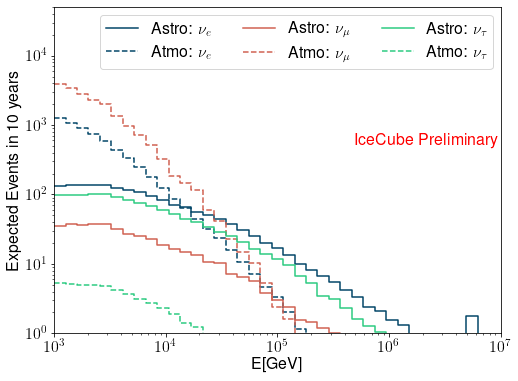

In [63]:
fig,ax = plt.subplots(figsize=(8,6))
bins=np.logspace(3,7, 40)
label = [r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$']

for i, ptype in enumerate([12,14,16]):
    
    mask = np.abs(mc.MCPrimary_pdg_encoding) == ptype
    print(ptype)
    hb_astro = hl.hist(
        (mc[mask].energy.values), 
        weights=mc[mask].weights_cscd_hans * mc[mask].weights_livetime  , 
        log=True, bins=bins, range=(10**3,10**7))

    hb_atmo = hl.hist(
        (mc[mask].energy.values), 
        weights=mc[mask].weights_MCEq_H3a_sibyll2_3c_total * mc[mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * mc[mask].weights_livetime , 
        log=True, bins=bins, range=(10**3,10**7))
    
    print(label[i])
    
    hl.plot1d(ax, hb_astro, ls='-', color=soft_colors[i], label='Astro: {}'.format(label[i]))
    hl.plot1d(ax, hb_atmo, ls='--', color=soft_colors[i], label='Atmo: {}'.format(label[i]))
    
'''hb_corsika = hl.hist(
    (corsika.energy.values), 
    weights=corsika.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hb_muon = hl.hist(
    (muon.energy.values), 
    weights=muon.weights , 
    log=True, bins=bins, range=(10**3,10**7))'''
#hb_ss = hl.hist(
#   (snowstorm.energy.values), 
##    weights=snowstorm.weights , 
#   log=True, bins=bins, range=(10**3,10**7))
'''hl.stack1d(ax, [ hb_muon + hb_corsika ,hb_atmo, hb_astro], 
           colors = [soft_colors[0], soft_colors[1], soft_colors[2]],
          labels=[r'Atmospheric $\mu$ Bkg', r'Atmospheric $\nu$ Bkg', r'Astrophysical $\nu$ Signal'])'''

#hb_data = hl.hist((exp.energy.values),  log=True, bins=bins, range=(10**3,10**7))
#hl.plot1d(ax, hb_data, color='k', crosses=True)
ax.set_ylabel('Expected Events in 10 years')
ax.set_xlabel('E[GeV]')
plt.loglog()
if preliminary:
    ax.text(10**5.7, 500, 'IceCube Preliminary', c='r')    
plt.ylim(1,50000)
plt.xlim(10**3,10**7)
plt.legend(ncol=3)
#cy.plotting.saving(plot_dir , 'exp_bkg_logE_corsika_only')

In [68]:
for key in mc.keys():
    if 'Labels' in key:
        print(key)

Duration_Labels
LabelsDeepLearning_EnergyVisible
LabelsDeepLearning_Length
LabelsDeepLearning_LengthInDetector
LabelsDeepLearning_PrimaryAzimuth
LabelsDeepLearning_PrimaryDirectionX
LabelsDeepLearning_PrimaryDirectionY
LabelsDeepLearning_PrimaryDirectionZ
LabelsDeepLearning_PrimaryEnergy
LabelsDeepLearning_PrimaryZenith
LabelsDeepLearning_TotalDepositedEnergy
LabelsDeepLearning_VertexTime
LabelsDeepLearning_VertexX
LabelsDeepLearning_VertexY
LabelsDeepLearning_VertexZ
LabelsDeepLearning_leading_energy_rel_entry
LabelsDeepLearning_num_coincident_events
LabelsDeepLearning_num_muons_at_entry
LabelsDeepLearning_num_muons_at_entry_above_threshold
LabelsDeepLearning_p_entering
LabelsDeepLearning_p_entering_muon_bundle
LabelsDeepLearning_p_entering_muon_single
LabelsDeepLearning_p_entering_muon_single_stopping
LabelsDeepLearning_p_is_track
LabelsDeepLearning_p_outside_cascade
LabelsDeepLearning_p_starting
LabelsDeepLearning_p_starting_300m
LabelsDeepLearning_p_starting_cc
LabelsDeepLearning_p

In [78]:
sum(mc['LabelsDeepLearning_p150_p_starting'] == 0)

4613

In [84]:
label = ['NuE', 'NuMu', 'NuTau']
for i, ptype in enumerate([12,14,16]):
    st_mask = (np.abs(mc.MCPrimary_pdg_encoding) == ptype) & (mc.LabelsDeepLearning_p150_p_starting == 1.0)
    flmask = (np.abs(mc.MCPrimary_pdg_encoding) == ptype) 
    
    w_astro_st = sum(mc.weights_cscd_hans[st_mask])   
    w_astro = sum(mc.weights_cscd_hans[flmask])
    
    w_atmo_st = sum(mc.weights_MCEq_H3a_sibyll2_3c_total[st_mask] * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[st_mask])
    w_atmo= sum(mc.weights_MCEq_H3a_sibyll2_3c_total[flmask] * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[flmask])
    
    print(ptype, label[i])
    print('Frac Starting Astro hans {:.3f}'.format(w_astro_st / w_astro))
    print('Frac Starting Atmo {:.3f}'.format(w_atmo_st / w_atmo))

12 NuE
Frac Starting Astro hans 0.996
Frac Starting Atmo 1.000
14 NuMu
Frac Starting Astro hans 0.974
Frac Starting Atmo 0.991
16 NuTau
Frac Starting Astro hans 0.996
Frac Starting Atmo 0.998


In [85]:
label = ['NuE', 'NuMu', 'NuTau']
for i, ptype in enumerate([12,14,16]):
    st_mask = (np.abs(mc.MCPrimary_pdg_encoding) == ptype) & (mc.LabelsDeepLearning_p_starting == 1.0)
    flmask = (np.abs(mc.MCPrimary_pdg_encoding) == ptype) 
    print(ptype, label[i])
    print('Frac Starting Astro hans {:.3f}'.format(sum(mc.weights_cscd_hans[st_mask]) / sum(mc.weights_cscd_hans[flmask])))
    print('Frac Starting Atmo {:.3f}'.format(sum(mc.weights_MCEq_H3a_sibyll2_3c_total[st_mask] * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[st_mask])
                               / sum(mc.weights_MCEq_H3a_sibyll2_3c_total[flmask] * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[flmask])))

12 NuE
Frac Starting Astro hans 0.818
Frac Starting Atmo 0.860
14 NuMu
Frac Starting Astro hans 0.765
Frac Starting Atmo 0.818
16 NuTau
Frac Starting Astro hans 0.818
Frac Starting Atmo 0.821


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


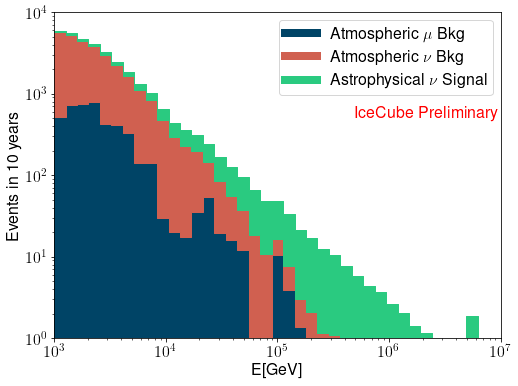

In [44]:
fig,ax = plt.subplots(figsize=(8,6))
bins=np.logspace(3,7, 40)
hb_astro = hl.hist(
    (mc.energy.values), 
    weights=mc.weights_cscd_hans * mc.weights_livetime  , 
    log=True, bins=bins, range=(10**3,10**7))

hb_atmo = hl.hist(
    (mc.energy.values), 
    weights=mc.weights_MCEq_H3a_sibyll2_3c_total * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * mc.weights_livetime , 
    log=True, bins=bins, range=(10**3,10**7))

hb_corsika = hl.hist(
    (corsika.energy.values), 
    weights=corsika.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hb_muon = hl.hist(
    (muon.energy.values), 
    weights=muon.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hb_ss = hl.hist(
   (snowstorm.energy.values), 
    weights=snowstorm.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hl.stack1d(ax, [ hb_muon + hb_corsika ,hb_atmo, hb_astro], 
           colors = [soft_colors[0], soft_colors[1], soft_colors[2]],
          labels=[r'Atmospheric $\mu$ Bkg', r'Atmospheric $\nu$ Bkg', r'Astrophysical $\nu$ Signal'])

#hb_data = hl.hist((exp.energy.values),  log=True, bins=bins, range=(10**3,10**7))
#hl.plot1d(ax, hb_data, color='k', crosses=True)
ax.set_ylabel('Events in 10 years')
ax.set_xlabel('E[GeV]')
plt.loglog()
if preliminary:
    ax.text(10**5.7, 500, 'IceCube Preliminary', c='r')    
plt.ylim(1,10000)
plt.xlim(10**3,10**7)
plt.legend()
#cy.plotting.saving(plot_dir , 'exp_bkg_logE_corsika_only')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/exp_bkg_sindec


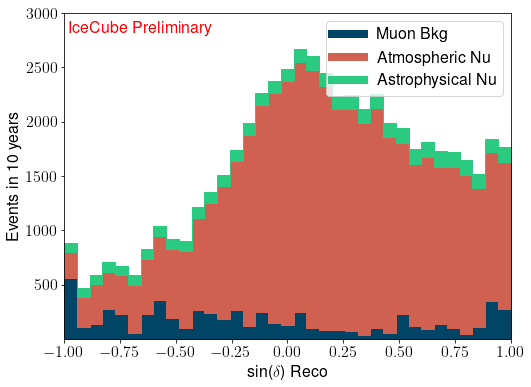

In [29]:
fig,ax = plt.subplots(figsize=(8,6))
hb_astro = hl.hist(
    np.sin(mc.dec.values), 
    weights=mc.weights_cscd_hans * mc.weights_livetime  , 
     bins=bins, range=(-1,1))

hb_atmo = hl.hist(
    np.sin(mc.dec.values), 
    weights=mc.weights_MCEq_H3a_sibyll2_3c_total * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * mc.weights_livetime , 
     bins=bins, range=(-1,1))

hb_corsika = hl.hist(
    np.sin(corsika.dec.values), 
    weights=corsika.weights , 
    bins=bins, range=(-1,1))
hb_muon = hl.hist(
    np.sin(muon.energy.values), 
    weights=muon.weights , 
     bins=bins, range=(-1,1))
hb_ss = hl.hist(
   np.sin(snowstorm.energy.values), 
    weights=snowstorm.weights , 
    bins=bins, range=(-1,1))
hl.stack1d(ax, [hb_corsika + hb_muon,hb_atmo, hb_astro], 
           colors = [soft_colors[0], soft_colors[1], soft_colors[2]],
          labels=['Muon Bkg', 'Atmospheric Nu', 'Astrophysical Nu'])

#hb_data = hl.hist(np.sin(exp.dec.values),  bins=bins, range=(-1,1))
#hl.plot1d(ax, hb_data, color='k', crosses=True)
ax.set_ylabel('Events in 10 years')
ax.set_xlabel('sin($\delta$) Reco')
#plt.semilogy()
if preliminary:
    ax.text(-.98, 2805, 'IceCube Preliminary', c='r')    
plt.ylim(1,3000)
plt.xlim(-1,1)
plt.legend()
cy.plotting.saving(plot_dir , 'exp_bkg_sindec')

-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/exp_bkg_logE_corsika_only


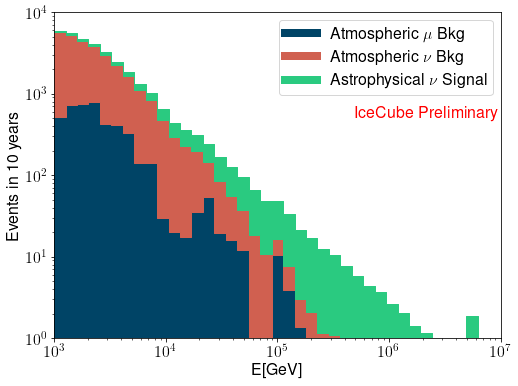

In [30]:
fig,ax = plt.subplots(figsize=(8,6))
bins=np.logspace(3,7, 40)
hb_astro = hl.hist(
    (mc.energy.values), 
    weights=mc.weights_cscd_hans * mc.weights_livetime  , 
    log=True, bins=bins, range=(10**3,10**7))

hb_atmo = hl.hist(
    (mc.energy.values), 
    weights=mc.weights_MCEq_H3a_sibyll2_3c_total * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * mc.weights_livetime , 
    log=True, bins=bins, range=(10**3,10**7))

hb_corsika = hl.hist(
    (corsika.energy.values), 
    weights=corsika.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hb_muon = hl.hist(
    (muon.energy.values), 
    weights=muon.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hb_ss = hl.hist(
   (snowstorm.energy.values), 
    weights=snowstorm.weights , 
    log=True, bins=bins, range=(10**3,10**7))
hl.stack1d(ax, [ hb_muon + hb_corsika ,hb_atmo, hb_astro], 
           colors = [soft_colors[0], soft_colors[1], soft_colors[2]],
          labels=[r'Atmospheric $\mu$ Bkg', r'Atmospheric $\nu$ Bkg', r'Astrophysical $\nu$ Signal'])

#hb_data = hl.hist((exp.energy.values),  log=True, bins=bins, range=(10**3,10**7))
#hl.plot1d(ax, hb_data, color='k', crosses=True)
ax.set_ylabel('Events in 10 years')
ax.set_xlabel('E[GeV]')
plt.loglog()
if preliminary:
    ax.text(10**5.7, 500, 'IceCube Preliminary', c='r')    
plt.ylim(1,10000)
plt.xlim(10**3,10**7)
plt.legend()
cy.plotting.saving(plot_dir , 'exp_bkg_logE_corsika_only')

-> /home/ssclafani/public_html/DNNC/plots/dataset_plots/exp_bkg_logE


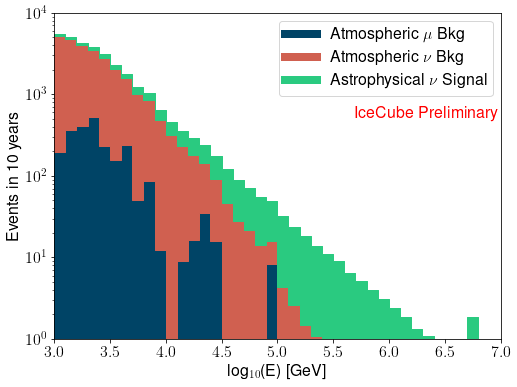

In [31]:
fig,ax = plt.subplots(figsize=(8,6))
bins=np.linspace(3,7, 41)
hb_astro = hl.hist(
    np.log10(mc.energy.values), 
    weights=mc.weights_cscd_hans * mc.weights_livetime  , 
    log=False, bins=bins, range=(3,7))

hb_atmo = hl.hist(
    np.log10(mc.energy.values), 
    weights=mc.weights_MCEq_H3a_sibyll2_3c_total * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * mc.weights_livetime , 
    log=False, bins=bins, range=(3,7))

hb_corsika = hl.hist(
    np.log10(corsika.energy.values), 
    weights=corsika.weights , 
    log=False, bins=bins, range=(3,7))
hb_muon = hl.hist(
    np.log10(muon.energy.values), 
    weights=muon.weights , 
    log=False, bins=bins,range=(3,7))
hb_ss = hl.hist(
   np.log10(snowstorm.energy.values), 
    weights=snowstorm.weights , 
    log=False, bins=bins, range=(3,7))
hl.stack1d(ax, [ hb_corsika ,hb_atmo, hb_astro], 
           colors = [soft_colors[0], soft_colors[1], soft_colors[2]],
          labels=[r'Atmospheric $\mu$ Bkg', r'Atmospheric $\nu$ Bkg', r'Astrophysical $\nu$ Signal'])

#hb_data = hl.hist((exp.energy.values),  log=True, bins=bins, range=(10**3,10**7))
#hl.plot1d(ax, hb_data, color='k', crosses=True)
ax.set_ylabel('Events in 10 years')
ax.set_xlabel('log$_{10}$(E) [GeV]')
plt.semilogy()
if preliminary:
    ax.text(5.7, 500, 'IceCube Preliminary', c='r')    
plt.ylim(1,10000)
plt.xlim(3,7)
#plt.grid()
plt.legend()
cy.plotting.saving(plot_dir , 'exp_bkg_logE')

In [32]:
total_weight = sum(mc.weights)  +  sum(corsika.weights) #+ sum(muon.weights)
print('Nu Purity = {:.4}'.format(sum(mc.weights) /total_weight ))
print('Mu Purity = {:.4}'.format( (  sum(corsika.weights) )/total_weight ))

print('Astro Purity = {:.4}'.format( sum(mc.weights_mese_flux * mc.weights_livetime) / sum(mc.weights)  ))

mask = mc.energy > 1e4
print('Astro Purity > 1e4 = {:.4}'.format( sum(mc[mask].weights_mese_flux * mc[mask].weights_livetime) / sum(mc[mask].weights)  ))

Nu Purity = 0.9378
Mu Purity = 0.06216
Astro Purity = 0.08121
Astro Purity > 1e4 = 0.5703


In [33]:
#Templates

In [ ]:
kra5_map, kra5_energy_bins = cy.selections.mrichman_repo.get_template('KRA-gamma_5PeV_maps_energies', per_pixel_flux=True)
pi0_map = cy.selections.mrichman_repo.get_template ('Fermi-LAT_pi0_map')
kra50_map, kra50_energy_bins= cy.selections.mrichman_repo.get_template('KRA-gamma_maps_energies', per_pixel_flux=True)

Reading /data/user/mrichman/data/analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy ...
Reading /data/user/mrichman/data/analyses/templates/Fermi-LAT_pi0_map.npy ...
Reading /data/user/mrichman/data/analyses/templates/KRA-gamma_maps_energies.tuple.npy ...


In [ ]:
class Cascades(cy.selections.MESEDataSpecs.MESCDataSpec):

    # set livetime and data
    _keep = _keep = 'mjd true_energy oneweight'.split ()                       
    _keep32 = ['azimuth', 'zenith', 'ra', 'dec', 'energy', 'sigma',
               'dist', 'true_ra', 'true_dec', 'xdec' ,'xra', 'mu_score', 'c_score',
               'dpsi', 'delta_ra', 'delta_dec'] 
    _livetime = 3519.685 * 86400 #356 * 86400 #

    _path_data = ['/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2011_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2012_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2013_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2014_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2015_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2016_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2017_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2018_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2019_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2020_exp.npy']
    
    _path_sig = '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_NuGen_bfrv1_2153x.npy'
    #_path_sig = '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.npy'
    _bins_sindec = np.linspace (-1, 1, 31)
    _bins_logenergy = np.linspace (2, 8.0, 15)
    _kw_energy = dict (bins_sindec=np.linspace (-1, 1, 10))

In [ ]:
ana = cy.get_analysis(cy.selections.Repository(), Cascades)

In [ ]:
#cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/gp/templates/')
fig, ax = plt.subplots (figsize= (8,6), subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='inferno'))
mesh, cb = sp.plot_map(ax, np.log10(pi0_map), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'log$_{10}$(PDF)')
plt.title('Fermi $\pi^0$ Template')
plt.tight_layout()
#plt.savefig('/home/ssclafani/public_html/DNNC/plots/gp/templates/pi0.png')

In [ ]:
import healpy as hp
hp.disable_warnings()

In [ ]:
gp_conf = {
            'template': pi0_map,
            'flux': cy.hyp.PowerLawFlux(2.5),
            'fitter_args': dict(gamma=2.5),
            'sigsub': True,
            #'sigmas' : np.radians( np.r_[np.arange(0,30,.5), np.arange(30,50, 2), np.arange(50,90,5)]),
            'randomize' : ['ra'], #, cy.inj.PoleRandomizer],
            #'pole_radius' : np.radians(5),
            'update_bg' : True,
            'fast_weight': False}
    # cache angular-resolution-smeared maps to disk
    #'dir': cy.utils.ensure_dir('{}/templates/pi0'.format(ana_dir))}
    #print('Calculating Sensitvity for Galactic Plane PI-0 Template')
template_tr = cy.get_trial_runner(gp_conf, ana=ana)

In [ ]:
a = ana[0]

In [ ]:
acc_param = a.acc_param(a.sig, gamma=2.5)

In [ ]:
template_model = cy.inspect.get_space_model(template_tr)
unsmoothed_template = template_model.pdf_space_sig[0]

In [ ]:
#cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/gp/templates/')
fig, ax = plt.subplots (figsize= (8,6), subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='inferno'))
mesh, cb = sp.plot_map(ax, np.log10(unsmoothed_template), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'log$_{10}$(PDF)')
plt.title('Fermi $\pi^0$ Template')
plt.tight_layout()

#plt.savefig('/home/ssclafani/public_html/DNNC/plots/gp/templates/pi0.png')

In [ ]:
gp_conf = {
            'template': kra5_map,
            'bins_energy' : kra5_energy_bins,
            'fitter_args': dict(gamma=2.5),
            'sigsub': True,
            #'sigmas' : np.radians( np.r_[np.arange(0,30,.5), np.arange(30,50, 2), np.arange(50,90,5)]),
            'randomize' : ['ra'], #, cy.inj.PoleRandomizer],
            #'pole_radius' : np.radians(5),
            'update_bg' : True}
    # cache angular-resolution-smeared maps to disk
    #'dir': cy.utils.ensure_dir('{}/templates/pi0'.format(ana_dir))}
    #print('Calculating Sensitvity for Galactic Plane PI-0 Template')
template_tr = cy.get_trial_runner(gp_conf, ana=ana)

In [ ]:
template_model = cy.inspect.get_space_model(template_tr)
unsmoothed_template = template_model.pdf_space_sig[0]

In [ ]:
#cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/gp/templates/')
fig, ax = plt.subplots (figsize= (8,6), subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='inferno'))
mesh, cb = sp.plot_map(ax, np.log10(unsmoothed_template), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'log$_{10}$(PDF)')
plt.title('KRA$_\gamma^{5\,PeV}$ Template')
plt.tight_layout()
#plt.savefig('/home/ssclafani/public_html/DNNC/plots/gp/templates/pi0.png')

In [ ]:
np.degrees(template_model.sigmas)

In [ ]:
template_model = cy.inspect.get_space_model(template_tr)
unsmoothed_template = template_model.pdf_space_sig[1]
#cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/gp/templates/')
fig, ax = plt.subplots (figsize= (8,6), subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='inferno'))
mesh, cb = sp.plot_map(ax, np.log10(unsmoothed_template), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'log$_{10}$(PDF)')
plt.title('KRA$_\gamma^{5\,PeV}$ Template')
plt.tight_layout()
#plt.savefig('/home/ssclafani/public_html/DNNC/plots/gp/templates/pi0.png')

In [ ]:
template_model = cy.inspect.get_space_model(template_tr)
unsmoothed_template = template_model.pdf_space_sig[8]
#cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/plots/gp/templates/')
fig, ax = plt.subplots (figsize= (8,6), subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='inferno'))
mesh, cb = sp.plot_map(ax, np.log10(unsmoothed_template), n_ticks=2)
kw = dict(color='.5', alpha=.5)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'log$_{10}$(PDF)')
plt.title('KRA$_\gamma^{5\,PeV}$ Template')
plt.tight_layout()
#plt.savefig('/home/ssclafani/public_html/DNNC/plots/gp/templates/pi0.png')